## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

In [1]:
import requests
import re

In [2]:
url = "http://www.bjsubway.com/station/zjgls/#"
response = requests.get(url)
response.encoding = 'GBK'
response.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<title>站间公里数 | 北京地铁官方网站</title>\r\n<meta name="keywords" content="北京地铁官方网站,首末车时间" />\r\n<meta name="description" content="可以查询站点的首末车通车时间，避免错过对出行造成不便。" />\r\n<link rel="shortcut icon" href="http://www.bjsubway.com/favicon.ico" type="image/x-icon" />\r\n<link href="http://www.bjsubway.com/subway/css/common.css" rel="stylesheet" type="text/css" />\r\n<link href="http://www.bjsubway.com/subway/css/search.css" rel="stylesheet" type="text/css" />\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/jquery.js"></script>\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/around.js"></script>\r\n<script type="text/javascript">\r\n/*线路名称多窗口切换效果*/\r\nfunction GetId(id){\r\n  return document.getElementBy

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [3]:
pattern = re.compile(r'<th>(\w+)——(\w+)</th>\r\n\s+<td.*>(\d+)</td>\r\n')
stations_info = pattern.findall(response.text)

In [4]:
print(len(stations_info))
print(stations_info[0])
print(stations_info[-1])
stations = []
for sta_1, sta_2, l in stations_info:
    stations.append(sta_1)
    stations.append(sta_2)
stations = set(stations)
print(len(stations))

330
('苹果园', '古城', '2606')
('T2航站楼', '三元桥', '20619')
288


In [5]:
import networkx as nx
subway_network = nx.Graph()

for sta_1, sta_2, l in stations_info:
    subway_network.add_edge(sta_1, sta_2, length=float(l))

print(subway_network.number_of_nodes(), subway_network.number_of_edges()) 
#四惠--四惠东 在1号线和八通线有重复，所以有329个edge

288 329


In [6]:
subway_network.edges['苹果园','古城']

{'length': 2606.0}

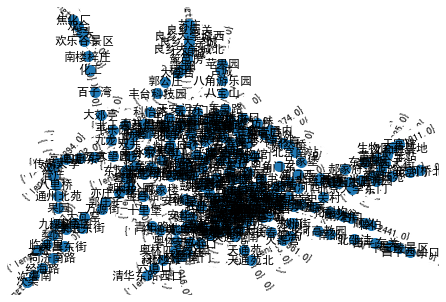

In [8]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(subway_network, iterations=100, weight='length', scale=1000)
nx.draw(subway_network, pos, with_labels=True, node_size=100)
nx.draw_networkx_edge_labels(subway_network, pos)
plt.show()

In [30]:
from collections import defaultdict
subway_connections = defaultdict(dict)
subway_connections.update(subway_network.adj.items())

In [31]:
subway_connections

defaultdict(dict,
            {'苹果园': AtlasView({'古城': {'length': 2606.0}}),
             '古城': AtlasView({'苹果园': {'length': 2606.0}, '八角游乐园': {'length': 1921.0}}),
             '八角游乐园': AtlasView({'古城': {'length': 1921.0}, '八宝山': {'length': 1953.0}}),
             '八宝山': AtlasView({'八角游乐园': {'length': 1953.0}, '玉泉路': {'length': 1479.0}}),
             '玉泉路': AtlasView({'八宝山': {'length': 1479.0}, '五棵松': {'length': 1810.0}}),
             '五棵松': AtlasView({'玉泉路': {'length': 1810.0}, '万寿路': {'length': 1778.0}}),
             '万寿路': AtlasView({'五棵松': {'length': 1778.0}, '公主坟': {'length': 1313.0}}),
             '公主坟': AtlasView({'万寿路': {'length': 1313.0}, '军事博物馆': {'length': 1172.0}, '莲花桥': {'length': 1016.0}, '西钓鱼台': {'length': 2386.0}}),
             '军事博物馆': AtlasView({'公主坟': {'length': 1172.0}, '木樨地': {'length': 1166.0}, '白堆子': {'length': 1912.0}, '北京西站': {'length': 1398.0}}),
             '木樨地': AtlasView({'军事博物馆': {'length': 1166.0}, '南礼士路': {'length': 1291.0}}),
             '南礼士路'

In [32]:
for key, item in subway_connections['古城'].items():
    print(key, item)

苹果园 {'length': 2606.0}
八角游乐园 {'length': 1921.0}


##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [59]:
def bfs(subway, start, goal):

    if start == goal:
        return [start]
    frontier = [start]
    explored = set()
    parents = dict()
    
    while True:
        if len(frontier) == 0:
            return []
        current_station = frontier.pop(0)
        explored.add(current_station)
        for next_station, length_dict in subway[current_station].items():
            if next_station not in explored and next_station not in frontier:
                parents[next_station] = current_station
                if next_station == goal:
                    return backtrack(start, goal, parents)
                frontier.append(next_station)
                
def backtrack(start, goal, parents):
    path = [goal]
    station = goal
    while True:
        path.append(parents[station])
        if parents[station] == start: break
        station = parents[station]
    return list(reversed(path))                
    

In [60]:
print(bfs(subway_connections, '褡裢坡', '奥林匹克公园'))

['褡裢坡', '青年路', '十里堡', '金台路', '呼家楼', '东大桥', '朝阳门', '东四', '南锣鼓巷', '什刹海', '鼓楼大街', '安德里北街', '安华桥', '北土城', '奥体中心', '奥林匹克公园']


## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)